<a href="https://colab.research.google.com/github/Garyzhao231/g_ai_project/blob/main/Frequency_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import zipfile

folder_path = "/content/"
df = None

# Iterate through the contents of the folder
for filename in os.listdir(folder_path):
    full_path = os.path.join(folder_path, filename)

    # Check if the current item is a ZIP file
    if filename.endswith(".zip"):
        print(f"Extracting {full_path}...")

        # Extract the ZIP file
        with zipfile.ZipFile(full_path, 'r') as zip_ref:
            zip_ref.extractall(folder_path)  # Extract files to the folder

    # Check if the current item is a CSV file
    elif filename.endswith(".csv"):
        print(full_path)
        temp_df = pd.read_csv(full_path, skipinitialspace=True)

        # Concatenate the DataFrame
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], ignore_index=True)

# Now, df should contain all concatenated CSV files


Extracting /content/C_78DM8fG6E.zip...


In [ ]:
import os
import pandas as pd
import zipfile
from bs4 import BeautifulSoup
import re

folder_path = "/content/"
df = None

# Iterate through the contents of the folder
for filename in os.listdir(folder_path):
    full_path = os.path.join(folder_path, filename)

    # Check if the current item is a ZIP file
    if filename.endswith(".zip"):
        print(f"Extracting {full_path}...")

        # Extract the ZIP file
        with zipfile.ZipFile(full_path, 'r') as zip_ref:
            zip_ref.extractall(folder_path)  # Extract files to the folder

    # Check if the current item is a CSV file
    elif filename.endswith(".csv"):
        print(f"Reading {full_path}")
        temp_df = pd.read_csv(full_path, skipinitialspace=True)

        # Concatenate the DataFrame
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], ignore_index=True)

# Check if df is initialized properly
if df is None:
    print("No CSV files found.")
else:
    print(df.head())  # Print the first few rows to inspect

    # Now proceed with cleaning and processing
    df['Comment'] = df['Comment'].fillna('')

    def clean_text(text):
        # Remove HTML tags
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()

        # Remove special ASCII symbols
        text = re.sub(r'[^\x00-\x7F]+', '', text)

        # Remove asterisks around each letter in the phrase and words attached to @
        text = re.sub(r'\*|@\w+|@|\?|!', '', text)

        return text.strip()

    # Apply clean_text function to all rows
    df['clean_comment'] = df['Comment'].apply(lambda x: clean_text(x))

    # Define a function to filter sentences with less than 10 words
    def filter_sentences(text):
        sentences = text.split('.')
        filtered_sentences = [sentence for sentence in sentences if len(sentence.split()) >= 10]
        return '. '.join(filtered_sentences)

    # Apply the filter_sentences function to 'clean_comment' column
    df['clean_comment'] = df['clean_comment'].apply(filter_sentences)

    # Function to filter out rows with empty 'clean_comment' values
    def filter_empty_comments(row):
        return row['clean_comment'].strip() != ''

    # Apply the filter function to remove rows with empty 'clean_comment'
    df = df[df.apply(filter_empty_comments, axis=1)]


Reading /content/880TBXMuzmk.csv
Reading /content/hJP5GqnTrNo.csv
Reading /content/Yd0yQ9yxSYY.csv
Reading /content/b76gsOSkHB4.csv
Extracting /content/C_78DM8fG6E.zip...
Reading /content/540vzMlf-54.csv
Reading /content/XKMvk5hWDfo.csv
Reading /content/qrvK_KuIeJk.csv
Reading /content/uJnhh7YSr5Q.csv
Reading /content/WY518YRfs5M.csv
Reading /content/gMsQO5u7-NQ.csv
Reading /content/rb7NddXDdxs.csv
Reading /content/xoVJKj8lcNQ.csv
Reading /content/_x9AwxfjxvE.csv
Reading /content/eXdVDhOGqoE.csv
Reading /content/C_78DM8fG6E.csv
Reading /content/USsh-XK6s6U.csv
Reading /content/-qReeg7imGc.csv
Reading /content/RdAQnkDzGvc.csv
Reading /content/VzUmLAUPSQo.csv
Reading /content/aZ5EsdnpLMI.csv
Reading /content/2yd18z6iSyk.csv
Reading /content/vJefOB8kec8.csv
Reading /content/Tpq3hRt0pmw.csv
Reading /content/LWiM-LuRe6w.csv
Reading /content/cqc0xni25n0.csv
Reading /content/SVcsDDABEkM.csv
   Comment Type                                            Comment  \
0  Main Comment  I can sum up the

<ipython-input-5-27b86e83b2de>:44: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [ ]:
pip install yake wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.6 MB/s eta 0:00:00


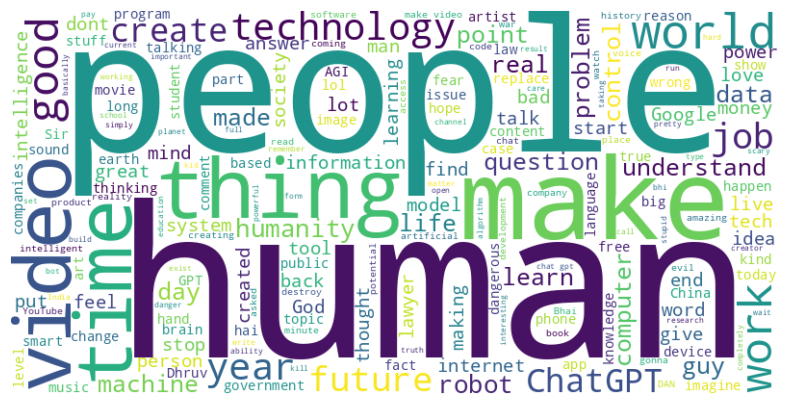

In [ ]:
import yake
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# YAKE keyword extraction model
def extract_keywords(texts, max_ngram_size=1, num_of_keywords=20, language="en"):
    kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=num_of_keywords)

    # Extract keywords for each comment
    keywords = []
    for text in texts:
        extracted_keywords = kw_extractor.extract_keywords(text)
        for kw, score in extracted_keywords:
            keywords.append(kw)
    return keywords

# Function to generate a word cloud from a list of keywords
def generate_wordcloud(keywords):
    text = " ".join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Ensure df is not None and contains 'clean_comment' column
if df is not None and 'clean_comment' in df.columns:
    # Extract comments from the 'clean_comment' column
    comments = df['clean_comment'].tolist()

    # Extract keywords using YAKE model
    keywords = extract_keywords(comments, max_ngram_size=1, num_of_keywords=20)

    # Generate and display the word cloud
    generate_wordcloud(keywords)
else:
    print("DataFrame is empty or 'clean_comment' column not found.")


Streaming output truncated to the last 5000 lines.
litracy: 1
aath: 1
aawo: 1
proofreading: 1
evolving,about: 1
logos,nobody: 1
turds: 1
Drhuv,tu: 1
bimari: 2
ilaj: 1
promot: 1
19:58: 1
containerized: 1
seekho: 1
lalu: 1
jina: 1
chhona: 1
deegre: 1
persue: 2
rajnikanth: 2
nagaland: 1
Qur'anAnd: 1
jinn: 1
duble: 1
karre: 1
karsakta: 1
wakhai: 1
samene: 1
Hardworks: 1
Siryou'r: 1
LevelPraise: 1
availabe: 1
previousstudent: 1
youshows: 1
Sps: 1
Rafi: 1
sikna: 1
oosh: 1
donor: 1
humlogo: 1
jorurat: 1
hamera: 1
taisi: 1
zalim: 1
cheff: 1
combodian: 1
disturbance: 1
Dhruv,Please: 1
history,it: 1
AndhBhakts: 1
bhaak: 1
jaenge: 2
Aaiye: 1
science,will: 1
DhruvPlease: 1
chorum: 1
ISRO: 2
backfoot: 1
laging: 1
Ludo: 1
shadi: 2
jashn: 1
chhorkar: 1
Hinduo: 1
RathMusalmano: 1
khidmat: 1
dilvaegiKhuda: 1
raste: 1
aajao: 3
lege: 1
bhruv: 1
aas: 1
chlra: 1
yisse: 1
kayi: 1
like-blackmailing: 1
puccha: 1
kucch: 1
skillshare: 1
timHeye: 1
plzzzzzzzzzz: 1
BeerBiceps: 1
watchovosky: 1
durr: 1
namunishan:

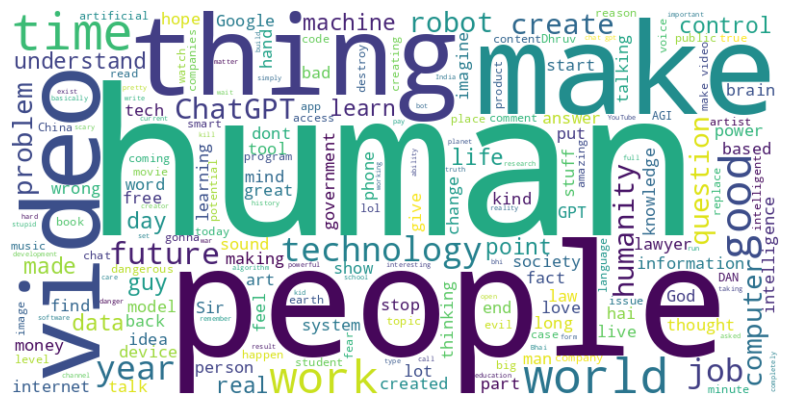

In [ ]:
import yake
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# YAKE keyword extraction model
def extract_keywords(texts, max_ngram_size=1, num_of_keywords=20, language="en"):
    kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=num_of_keywords)

    # Extract keywords for each comment and store them in a list
    keywords = []
    for text in texts:
        extracted_keywords = kw_extractor.extract_keywords(text)
        # Only store the keyword, ignore the score
        for kw, score in extracted_keywords:
            keywords.append(kw)
    return keywords

# Function to generate a word cloud from a list of keywords
def generate_wordcloud(keywords):
    text = " ".join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Function to calculate frequency of keywords
def calculate_keyword_frequency(keywords):
    keyword_frequency = Counter(keywords)
    return keyword_frequency

# Ensure df is not None and contains 'clean_comment' column
if df is not None and 'clean_comment' in df.columns:
    # Extract comments from the 'clean_comment' column
    comments = df['clean_comment'].tolist()

    # Extract keywords using YAKE model
    keywords = extract_keywords(comments, max_ngram_size=1, num_of_keywords=20)

    # Calculate the frequency of keywords
    keyword_frequency = calculate_keyword_frequency(keywords)

    # Print the extracted keywords and their frequencies
    print("Extracted Keywords with Frequencies:")
    for kw, freq in keyword_frequency.items():
        print(f"{kw}: {freq}")

    # Generate and display the word cloud
    generate_wordcloud(keywords)
else:
    print("DataFrame is empty or 'clean_comment' column not found.")


Extracted Keywords and Frequencies have been saved to 'extracted_keywords.csv'.


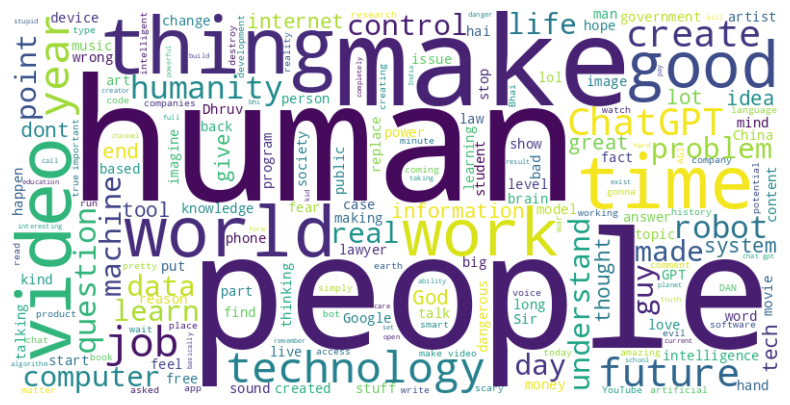

In [ ]:
import yake
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# YAKE keyword extraction model
def extract_keywords(texts, max_ngram_size=1, num_of_keywords=20, language="en"):
    kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=num_of_keywords)

    # Extract keywords for each comment and store them in a list
    keywords = []
    for text in texts:
        extracted_keywords = kw_extractor.extract_keywords(text)
        # Only store the keyword, ignore the score
        for kw, score in extracted_keywords:
            keywords.append(kw)
    return keywords

# Function to generate a word cloud from a list of keywords
def generate_wordcloud(keywords):
    text = " ".join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Function to calculate frequency of keywords
def calculate_keyword_frequency(keywords):
    keyword_frequency = Counter(keywords)
    return keyword_frequency

# Ensure df is not None and contains 'clean_comment' column
if df is not None and 'clean_comment' in df.columns:
    # Extract comments from the 'clean_comment' column
    comments = df['clean_comment'].tolist()

    # Extract keywords using YAKE model
    keywords = extract_keywords(comments, max_ngram_size=1, num_of_keywords=20)

    # Calculate the frequency of keywords
    keyword_frequency = calculate_keyword_frequency(keywords)

    # Convert the frequency dictionary to a pandas DataFrame
    keyword_df = pd.DataFrame(keyword_frequency.items(), columns=['Keyword', 'Frequency'])

    # Save the DataFrame to a CSV file
    keyword_df.to_csv('extracted_keywords.csv', index=False)

    print("Extracted Keywords and Frequencies have been saved to 'extracted_keywords.csv'.")

    # Generate and display the word cloud
    generate_wordcloud(keywords)
else:
    print("DataFrame is empty or 'clean_comment' column not found.")


Extracted Keywords and Frequencies (sorted) have been saved to 'extracted_keywords.csv'.


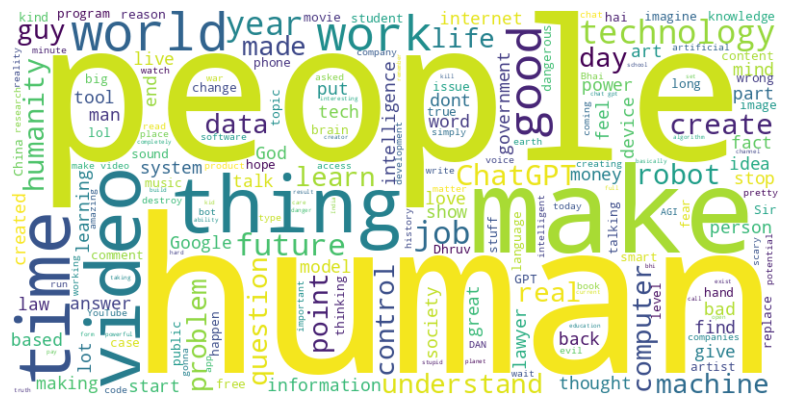

In [ ]:
import yake
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# YAKE keyword extraction model
def extract_keywords(texts, max_ngram_size=1, num_of_keywords=20, language="en"):
    kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=num_of_keywords)

    # Extract keywords for each comment and store them in a list
    keywords = []
    for text in texts:
        extracted_keywords = kw_extractor.extract_keywords(text)
        # Only store the keyword, ignore the score
        for kw, score in extracted_keywords:
            keywords.append(kw)
    return keywords

# Function to generate a word cloud from a list of keywords
def generate_wordcloud(keywords):
    text = " ".join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Function to calculate frequency of keywords
def calculate_keyword_frequency(keywords):
    keyword_frequency = Counter(keywords)
    return keyword_frequency

# Ensure df is not None and contains 'clean_comment' column
if df is not None and 'clean_comment' in df.columns:
    # Extract comments from the 'clean_comment' column
    comments = df['clean_comment'].tolist()

    # Extract keywords using YAKE model
    keywords = extract_keywords(comments, max_ngram_size=1, num_of_keywords=20)

    # Calculate the frequency of keywords
    keyword_frequency = calculate_keyword_frequency(keywords)

    # Convert the frequency dictionary to a pandas DataFrame
    keyword_df = pd.DataFrame(keyword_frequency.items(), columns=['Keyword', 'Frequency'])

    # Sort the DataFrame by 'Frequency' in descending order
    keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)

    # Save the DataFrame to a CSV file
    keyword_df.to_csv('extracted_keywords.csv', index=False)

    print("Extracted Keywords and Frequencies (sorted) have been saved to 'extracted_keywords.csv'.")

    # Generate and display the word cloud
    generate_wordcloud(keywords)
else:
    print("DataFrame is empty or 'clean_comment' column not found.")
